# Bibliotecas

In [1]:
# Bibliotecas base
import pandas as pd

In [2]:
# Plotagem e exibição de gráficos
from matplotlib import pyplot as plt

# Plotagem com Plotly Express
import plotly.express as px
import seaborn as sns

# Sobre o arquivo

## Processo de Obtenção
O arquivo `vgsales.csv` utilizado durante a execução deste projeto, pode ser obtido através do [Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales), disponibilizado de forma gratuta na plataforma pelo usuário [GregorySmith](https://www.kaggle.com/gregorut).

## Atualização e Disponibilização da Base de Dados
De acordo com as informações disponibilizadas no site do onde obtive o arquivo `vgsales.csv`, a base de dados foi gerada através do processo de *scrape* no site [VGChartz](https://www.vgchartz.com/).
Desta forma, com o objetivo de adicionar informações na base de dados e permitir um estudo sobre essa temática, realizei um processo de scrap no nesmo site. Para tal, utilizei como base o script disponibilizado pelo usuário [GregorUT](https://github.com/GregorUT/vgchartzScrape), com anotações e atualizações para atender a atual demanda.

## Uso da Base de Dados
Será mantida a licença GPL-3.0 de acordo com a o usuário [GregorUT](https://github.com/GregorUT/vgchartzScrape) e, como as informações diponibilizadas no site [VGChartz](https://www.vgchartz.com/) estão em domínio público, não há razões para modificar o termo de licença.

## Sobre a base de Dados
A base de dados é composta pelas seguintes informações:

1. `Rank`: Valor numério auto-incrementado. Não há relevância para análise.
0. `Name`: Nome do Jogo.
0. `Platform`: Plataforma em que o Jogo foi lançado.
0. `Day`: Dia em que o Jogo foi lançado.
0. `Month`: Mês em que o Jogo foi lançado.
0. `Year`: Ano em que o Jogo foi lançado.
0. `Genre`: Gênero do Jogo.
0. `Publisher`: Distribuidores do Jogo.
0. `Developer`: Desenvolvedores do Jogo
0. `Critic_Score`: Nota de Avaliação crítica do Jogo.
0. `User_Score`: Nota de Avaliação dos usuários referente ao Jogo.
0. `NA_Sales`: Território de Publicação de Jogos Eletrônicos (NA).
0. `EU_Sales`: Território de Publicação de Jogos Eletrônicos (EU).
0. `JP_Sales`: Território de Publicação de Jogos Eletrônicos (JP).
0. `PAL_Sales`: Território de Publicação de Jogos Eletrônicos (PAL).
0. `Other_Sales`: Agrupamento de outros territórios de Publicação de Jogos Eletrônicos.
0. `Global_Sales`: Total de vendas registradas.

Durante a execução deste processo, os dados serão analisados, tratados e, posteriormente exportados para exibir as informações através de Dashboards via Streamlit.

## Leitura do Arquivo
O arquivo está em `UTF-8`e possui como `index` a coluna 0 (zero).

### Informações Iniciais

In [14]:
# Leitura do arquivo 'vgsales.csv'
df = pd.read_csv('vgsales.csv', encoding='utf-8', index_col=0)

In [4]:
# Exibe as 5 (cinco) primeiras linhas do DataFrame
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
# Exibe as 5 (cinco) ultimas linhas do DataFrame
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
# Exibe a quantidade de linhas (rows = dados) e colunas (cols = atributos) da base de dados
df.shape

(16598, 10)

In [15]:
# Exibe o nome das colunas (atributos) da base de dados
df.keys()

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [16]:
# Por questões de estética, será realizada a tradução no nome das colunas (atributos)
df.rename(columns={'Name': 'Nome',
                   'Platform': 'Plataforma',
                   #'Day': 'Dia',
                   #'Month': 'Mês',
                   'Year': 'Ano',
                   'Genre': 'Gênero',
                   'Publisher': 'Publicação',
                   #'Developer': 'Desenvolvedor',
                   #'Critic_Score': 'Avaliação Crítica',
                   #'User_Score': 'Avaliação dos Usuários',
                   'NA_Sales': 'Vendas NA',
                   'EU_Sales': 'Vendas EU',
                   #'PAL_Sales': 'Vendas PAL',
                   'JP_Sales': 'Vendas JP',
                   'Other_Sales': 'Vendas OUT',
                   'Global_Sales': 'Total de Vendas'}, inplace=True)

In [17]:
# Exibe o nome das colunas (atributos) da base de dados após mudança dos nomes
df.keys()

Index(['Nome', 'Plataforma', 'Ano', 'Gênero', 'Publicação', 'Vendas NA',
       'Vendas EU', 'Vendas JP', 'Vendas OUT', 'Total de Vendas'],
      dtype='object')

### Dados Nulos
Processo de verificação de Dados Nulos na Base de dados.

In [18]:
# Exibe a soma dos dados nulos encontrados por coluna
df.isnull().sum()

Nome                 0
Plataforma           0
Ano                271
Gênero               0
Publicação          58
Vendas NA            0
Vendas EU            0
Vendas JP            0
Vendas OUT           0
Total de Vendas      0
dtype: int64

<div class="alert alert-block alert-info"> <b>INFORMAÇÃO:</b> Foi identificado a presença de dados nulos na base de dados. Estes dados devem ser verificados e analisados. Existem <b>271</b> registros sem informação no campo <b>Ano</b> e <b>58</b> registros sem informação no campo <b>Publicação</b>.</div>

#### Notas
Retirar antes de upar. Passar para outro ipynb para guardar de modelo de referência.

<div class="alert alert-block alert-success"> <b>NOTE:</b> Foi identificado a presença de dados nulos na base de dados. Estes dados devem ser verificados e analisados.</div>

<div class="alert alert-block alert-info"> <b>INFORMAÇÃO:</b> Foi identificado a presença de dados nulos na base de dados. Estes dados devem ser verificados e analisados.</div>

<div class="alert alert-block alert-warning"> <b>CUIDADO:</b> Foi identificado a presença de dados nulos na base de dados. Estes dados devem ser verificados e analisados.</div>

<div class="alert alert-block alert-danger"> <b>ATENÇÃO:</b> Foi identificado a presença de dados nulos na base de dados. Estes dados devem ser verificados e analisados.</div>

#### Análise de Campos Nulos

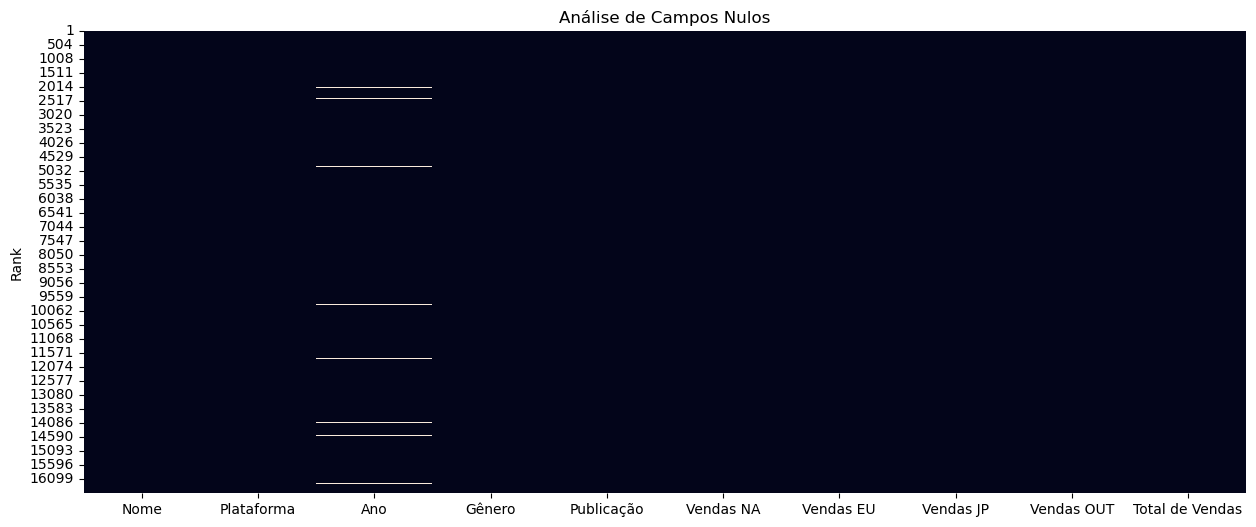

In [19]:
# Gráfico de distribuição dos valores Nulos
plt.figure(figsize=(15,6))
plt.title('Análise de Campos Nulos')
sns.heatmap(df.isnull(), cbar=False);

In [20]:
# Exibe as linhas que possuem, ao menos, um valor nulo
df[df.isna().any(axis=1)]

,Nome,Plataforma,Ano,Gênero,Publicação,Vendas NA,Vendas EU,Vendas JP,Vendas OUT,Total de Vendas
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...
16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01


In [21]:
# Quantidade de Linhas com, ao menos, um valor nulo
df[df.isna().any(axis=1)].shape

(307, 10)

<div class="alert alert-block alert-warning"> <b>CUIDADO:</b> Identificou-se a presença total de <b>307</b> registros contendo, ao menos, um atributo nulo. Este valor representa aproximadamente <b>1,85%</b> dos registros da base de dados.</div>

<div class="alert alert-block alert-danger"> <b>ATENÇÃO:</b> Optou-se, por questões de estudo, na exclusão dos dados que possuem ao menos um atributo nulo.</div>

In [22]:
# Apaga as linhas que possuem, ao menos, um valor nulo
df.dropna(inplace=True)

In [23]:
# Exibe a quantidade de linhas (rows = dados) e colunas (cols = atributos) da base de dados após a exclusão dos dados nulos
df.shape

(16291, 10)

In [25]:
# Exibe a soma dos dados nulos encontrados por coluna
df.isnull().sum()

Nome               0
Plataforma         0
Ano                0
Gênero             0
Publicação         0
Vendas NA          0
Vendas EU          0
Vendas JP          0
Vendas OUT         0
Total de Vendas    0
dtype: int64

In [24]:
# Quantidade de Linhas com, ao menos, um valor nulo. Observe que não há mais registros com valor nulo na base de dados
df[df.isna().any(axis=1)].shape

(0, 10)

### Tratamento de Atributos
É importante verificar os tipos de atributos que a Base de Dados possui para melhor exibi-las e analisa-las.

In [26]:
# Exibe os tipos de dados por colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nome             16291 non-null  object 
 1   Plataforma       16291 non-null  object 
 2   Ano              16291 non-null  float64
 3   Gênero           16291 non-null  object 
 4   Publicação       16291 non-null  object 
 5   Vendas NA        16291 non-null  float64
 6   Vendas EU        16291 non-null  float64
 7   Vendas JP        16291 non-null  float64
 8   Vendas OUT       16291 non-null  float64
 9   Total de Vendas  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


<div class="alert alert-block alert-info"> <b>NOTE:</b> Observe que o campo <b>Ano</b> está no formato <b>Float64</b> e deveriam estar em <b>Int64</b>. Por essa razão, estes campos serão formatados. Os demais campos apresentam formato condizente com a necessidade. Isso será tratado ao lidar com o atributo <b>Ano</b>.</div>


#### Rank (Index)

Após a exclusão de certos dados, e levando em conta que a quantidade de indices está diferente da quantidade de registros apresentados, iremos refazer a indexação da base de dados.

In [27]:
# Reseta a sequência numérica dos Indices do banco de dados
df.reset_index(drop=True, inplace=True)
display(df)

,Nome,Plataforma,Ano,Gênero,Publicação,Vendas NA,Vendas EU,Vendas JP,Vendas OUT,Total de Vendas
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16286,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16287,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16289,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#### Atributo `Ano`
Conforme mensionado anteriormente, será necessário a alteração do formato *float64* para *Int64*. Aproveitaremos a oportunidade para realizar algumas análises de distribuição de dados.

**Operações**
* Alteração no formato do campo;

**Análises**
* Distribuição dos dados ao longo dos anos;

##### Operações no atributo `Year`

In [28]:
# Converte os dados 'Ano' para Inteiro (Int64)
df['Ano'] = df['Ano'].convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nome             16291 non-null  object 
 1   Plataforma       16291 non-null  object 
 2   Ano              16291 non-null  Int64  
 3   Gênero           16291 non-null  object 
 4   Publicação       16291 non-null  object 
 5   Vendas NA        16291 non-null  float64
 6   Vendas EU        16291 non-null  float64
 7   Vendas JP        16291 non-null  float64
 8   Vendas OUT       16291 non-null  float64
 9   Total de Vendas  16291 non-null  float64
dtypes: Int64(1), float64(5), object(4)
memory usage: 1.3+ MB


In [29]:
df.head()

,Nome,Plataforma,Ano,Gênero,Publicação,Vendas NA,Vendas EU,Vendas JP,Vendas OUT,Total de Vendas
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


##### Análises do campo `Ano`

In [36]:
# Intervalo de valores únicos na coluna 'Ano' organizado de forma crescente (ascending=True)
df['Ano'].drop_duplicates().sort_values(ascending=True).values

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020]
Length: 39, dtype: Int64

In [39]:
# Quantidade de jogos publicados por ano organizado de forma crescente de acordo com o ano de lançamento
df['Ano'].value_counts().sort_index().values

<IntegerArray>
[   9,   46,   36,   17,   14,   14,   21,   16,   15,   17,   16,   41,   43,
   60,  121,  219,  263,  289,  379,  338,  349,  482,  829,  775,  744,  936,
 1008, 1201, 1428, 1431, 1257, 1136,  655,  546,  580,  614,  342,    3,    1]
Length: 39, dtype: Int64

In [42]:
# Quantidade de jogos publicados por ano
x_anos = df['Ano'].drop_duplicates().sort_values(ascending=True).values
#x_anos = df.groupby(['Ano'])['Ano'].count().index  # Outra forma de fazer a mesma ação anterior

y_contagem = df['Ano'].value_counts().sort_index().values
#y_contagem = df.groupby(['Ano'])['Ano'].count()  # Outra forma de fazer a mesma ação anterior

fig = px.line(x=x_anos, y=y_contagem,
            labels={
                "y": "Quantidade de Jogos",
                "x": "Período"},
            title='Jogos publicados ao longo dos anos<br><sup>1980-2020</sup>',
            line_shape='spline',
            markers=True)
fig.update_layout(xaxis_range=[1980,2020])
fig.show()

In [44]:
# Mesma representação anterior em outro gráfico
fig = px.bar(x=x_anos, y=y_contagem,
            labels={
                "y": "Quantidade de Jogos",
                "x": "Período"},
            title='Jogos publicados ao longo dos anos<br><sup>1980-2020</sup>')
fig.update_layout(xaxis_range=[1980,2020])
fig.show()

#### Distribuição de Dados pelo Atributo 'Name'

In [56]:
# Valores Únicos
df['Nome'].drop_duplicates().sort_values(ascending=True).values

array(["'98 Koshien", '.hack//G.U. Vol.1//Rebirth',
       '.hack//G.U. Vol.2//Reminisce', ..., 'uDraw Studio',
       'uDraw Studio: Instant Artist', '¡Shin Chan Flipa en colores!'],
      dtype=object)

In [65]:
# Quantidade de valores únicos no campo 'nome'
df['Nome'].drop_duplicates().count()

11325

<div class="alert alert-block alert-info"> <b>NOTE:</b> Foram registrados <b>11.325</b> jogos distintos na base de dados. Uma possível análise seria verificar nomes similares e agrupar para analisar as franquias de jogos.</div>

#### Distribuição de Dados pelo Atributo 'Plataform'

In [ ]:
# Valores Únicos
df['Platform'].value_counts()

In [ ]:
# Valores unicos 2
df['Platform'].unique()

In [ ]:
# Quantidade de vendas por plataforma
df.groupby('Platform').size()

In [ ]:
# Exibindo os dados em forma de gráfico
x = df.groupby(['Platform'])['Platform'].count().index
y = df.groupby(['Platform'])['Platform'].count()

fig = px.scatter(x=x, y=y,
                 marginal_y='violin',
                 labels={
                     "y": "Volume de Vendas de Jogos",
                     "x": "Plataformas"
                 },
                 title='Venda de Jogos por Plataforma')
#fig.update_layout(yaxis_range=[0,2500])
fig.show()

In [ ]:
df['Platform'].value_counts()['PS2']

In [ ]:
# Exibindo os dados em forma de gráfico
x = df.groupby(['Platform'])['Platform'].count().sort_values(ascending=False).index
y = df.groupby(['Platform'])['Platform'].count().sort_values(ascending=False)

fig = px.bar(x=x, y=y,
                 labels={
                     "y": "Volume de Vendas de Jogos",
                     "x": "Plataformas"
                 },
                 title='Venda de Jogos por Plataforma')
fig.show()

In [ ]:
# Para depois...
# Exibindo os dados em forma de gráfico
#fig = px.pie(df, values=df.index, names='Platform', title='Distribuição por Plataforma')
#fig = px.scatter(df, x='Platform', title='Distribuição por Plataforma', color='Publisher', marginal_x="histogram")
#fig.update_traces(marker_size=10)
#fig.update_layout(scattermode="group", scattergap=0.75)
#fig.show()

#### Distribuição de Dados pelo Atributo 'Genre'

In [ ]:
# Contagem de Gênero de jogos vendidos
sorted(df['Genre'].unique())

In [ ]:
df['Genre'].value_counts().sort_index()

In [ ]:
# Distribuição de vendas ao longo dos anos
x = df.groupby(['Genre'])['Genre'].count().sort_values(ascending=False).index # Nomes (names)
y = df.groupby(['Genre'])['Genre'].count().sort_values(ascending=False) # Quantidade (values)

fig = px.pie(values=y, names=x,
                 title='Venda de Jogos por Gênero')
fig.show()

#### Distribuição de Dados pelo Atributo 'Publisher'

In [ ]:
# Contagem por Desenvolvedoras
sorted(df['Publisher'].unique())

In [ ]:
# Contagem por Desenvolvedoras
df['Publisher'].value_counts().sort_index()

Para melhorar a visualização, mostrar apenas as desenvolvedoras com maior volume de jogos vendidos.

In [ ]:
x=df['Publisher'].value_counts().sort_index()
y=sorted(df['Publisher'].unique())

fig = px.bar(x=x, y=y,
                orientation='h',
                labels={
                    "x": "Quantidade de Vendas",
                    "y": "Plataforma de Publicação"
                },
                title='Venda de Jogos por Plataforma de Publicação')
fig.show()

### Verificação das vendas 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' e 'Global_Sales'

Sugestões de análises:
* Taxa de Variação de Preço por Plataforma
* Média de Preços por jogos ou plataformas

In [ ]:
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

In [ ]:
# Média das Colunas
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()

In [ ]:
# Média das Linhas
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean(axis=1)

# Exporta a Base de Dados

In [ ]:
# Exporta o Banco de Dados
df.to_csv(r'vgsales-bd-tratado.csv', index=False, encoding='utf-8')